In [1]:
import sys
import os

import torch 
torch.cuda.empty_cache()

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))

from NN_TopOpt import SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "simp_basic": SIMP_basic,
}

Info    : Reading '../test_problems/cantilever_beam_high_resolution.msh'...
Info    : 9 entities
Info    : 7142 nodes
Info    : 13942 elements
Info    : Done reading '../test_problems/cantilever_beam_high_resolution.msh'
Compute areas ...


100%|██████████| 13942/13942 [00:00<00:00, 149064.57it/s]


Whole area 0.15


100%|██████████| 13942/13942 [00:00<00:00, 17236.39it/s]


Fixed case:  fixed_xy [0, [0, 0.6]] 121 7142
Loaded loads:  (10,)
check dv 0 0.7172877127342713
Build filter matrix ...


100%|██████████| 13942/13942 [00:01<00:00, 7542.16it/s]


Iteration: 1 | current volfrac: 0.239891 | compliance: 0.001119
Iteration: 2 | current volfrac: 0.239994 | compliance: 0.000507
Iteration: 3 | current volfrac: 0.239895 | compliance: 0.000345
Iteration: 4 | current volfrac: 0.240173 | compliance: 0.000220
Iteration: 5 | current volfrac: 0.239914 | compliance: 0.000129
Iteration: 6 | current volfrac: 0.240034 | compliance: 0.000081
Iteration: 7 | current volfrac: 0.240020 | compliance: 0.000059
Iteration: 8 | current volfrac: 0.239989 | compliance: 0.000051
Iteration: 9 | current volfrac: 0.240012 | compliance: 0.000047
Iteration: 10 | current volfrac: 0.240036 | compliance: 0.000046
Iteration: 11 | current volfrac: 0.239996 | compliance: 0.000046
Iteration: 12 | current volfrac: 0.240029 | compliance: 0.000045
Iteration: 13 | current volfrac: 0.239980 | compliance: 0.000045
Iteration: 14 | current volfrac: 0.239966 | compliance: 0.000045
Iteration: 15 | current volfrac: 0.240035 | compliance: 0.000045
Iteration: 16 | current volfrac: 0

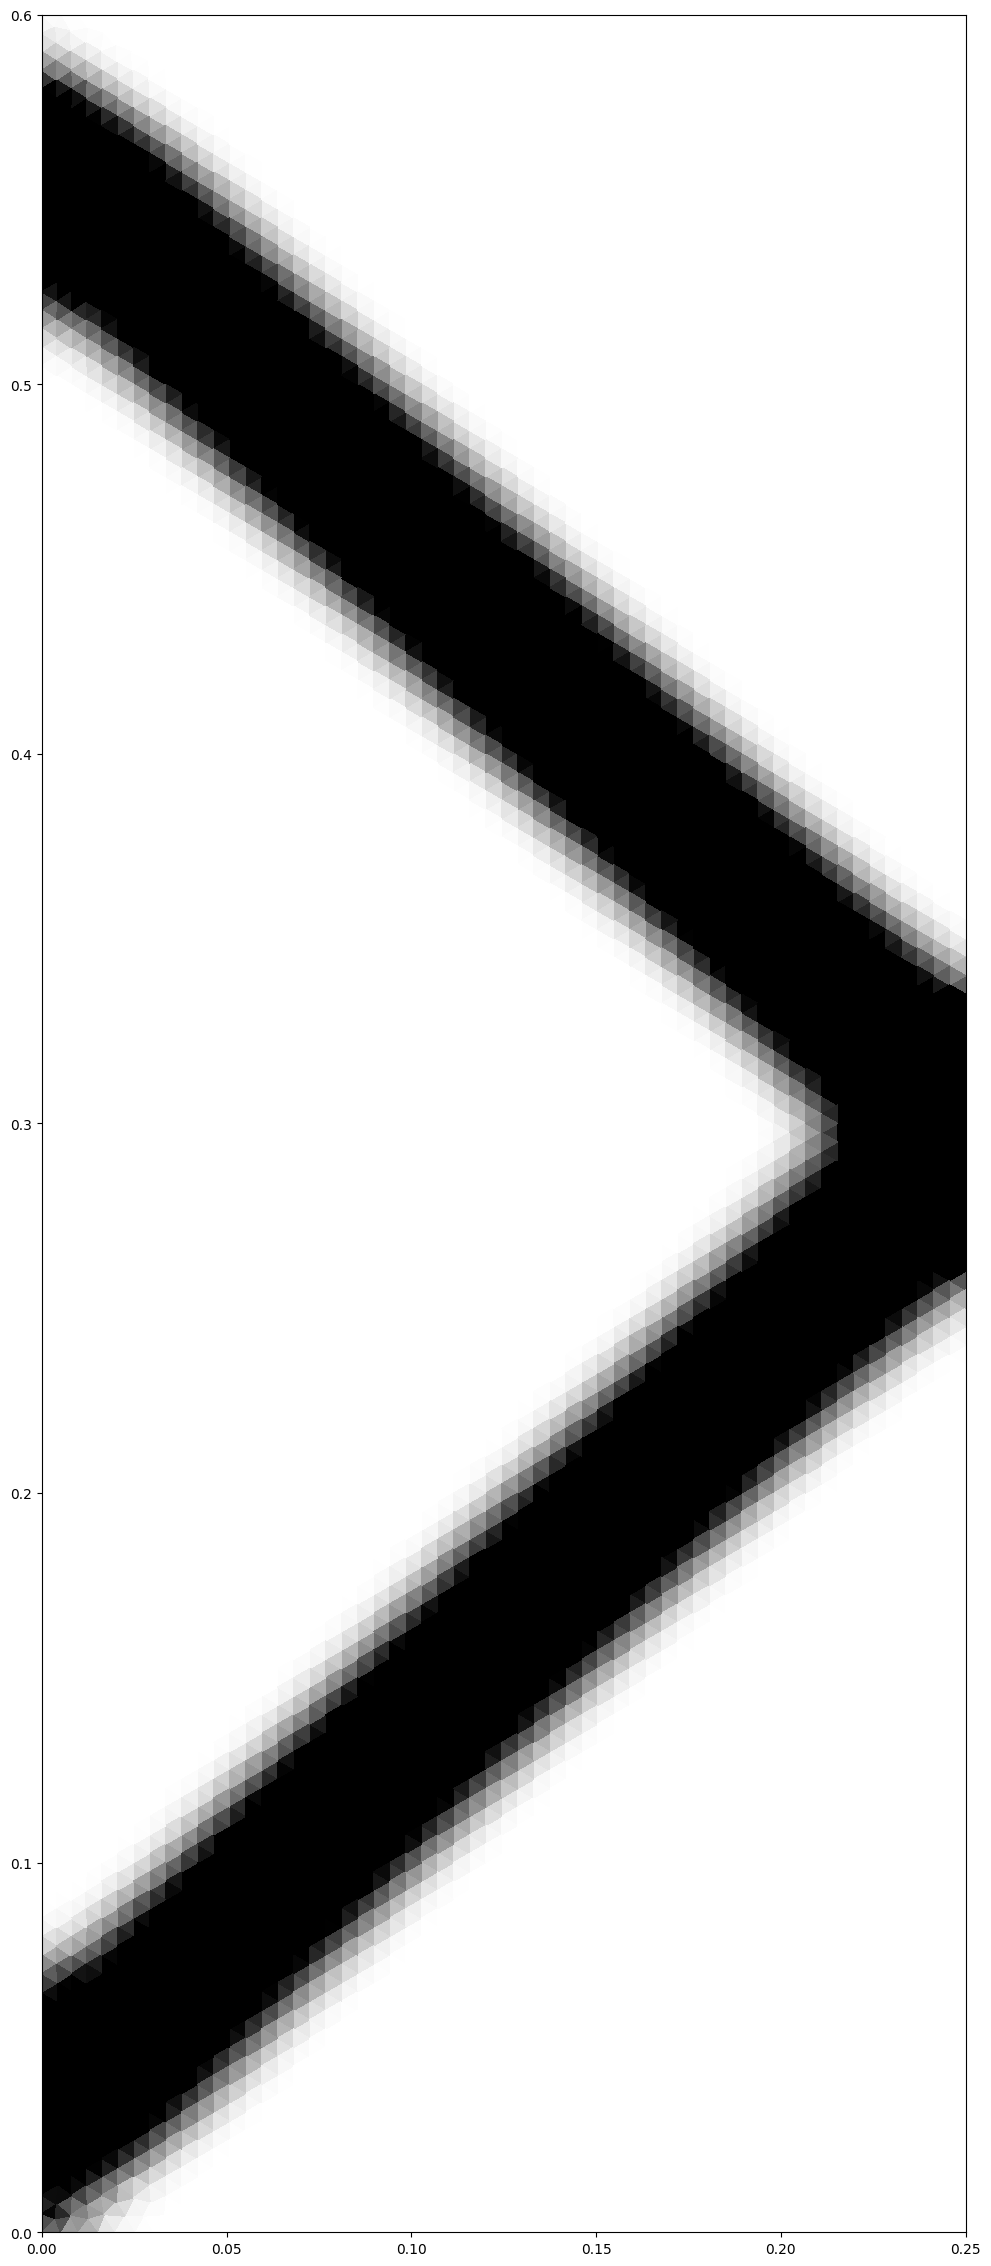

Iteration: 20 | current volfrac: 0.239992 | compliance: 0.000045
Iteration: 21 | current volfrac: 0.240002 | compliance: 0.000045
Iteration: 22 | current volfrac: 0.240000 | compliance: 0.000045
Iteration: 23 | current volfrac: 0.239987 | compliance: 0.000045
Iteration: 24 | current volfrac: 0.239966 | compliance: 0.000045
Iteration: 25 | current volfrac: 0.240014 | compliance: 0.000045
Iteration: 26 | current volfrac: 0.239966 | compliance: 0.000045
Iteration: 27 | current volfrac: 0.239993 | compliance: 0.000045
Iteration: 28 | current volfrac: 0.240006 | compliance: 0.000045
Iteration: 29 | current volfrac: 0.240006 | compliance: 0.000045
Iteration: 30 | current volfrac: 0.239995 | compliance: 0.000045
Iteration: 31 | current volfrac: 0.239978 | compliance: 0.000045
Iteration: 32 | current volfrac: 0.240032 | compliance: 0.000045
Iteration: 33 | current volfrac: 0.239992 | compliance: 0.000045
Iteration: 34 | current volfrac: 0.240025 | compliance: 0.000045
Iteration: 35 | current v

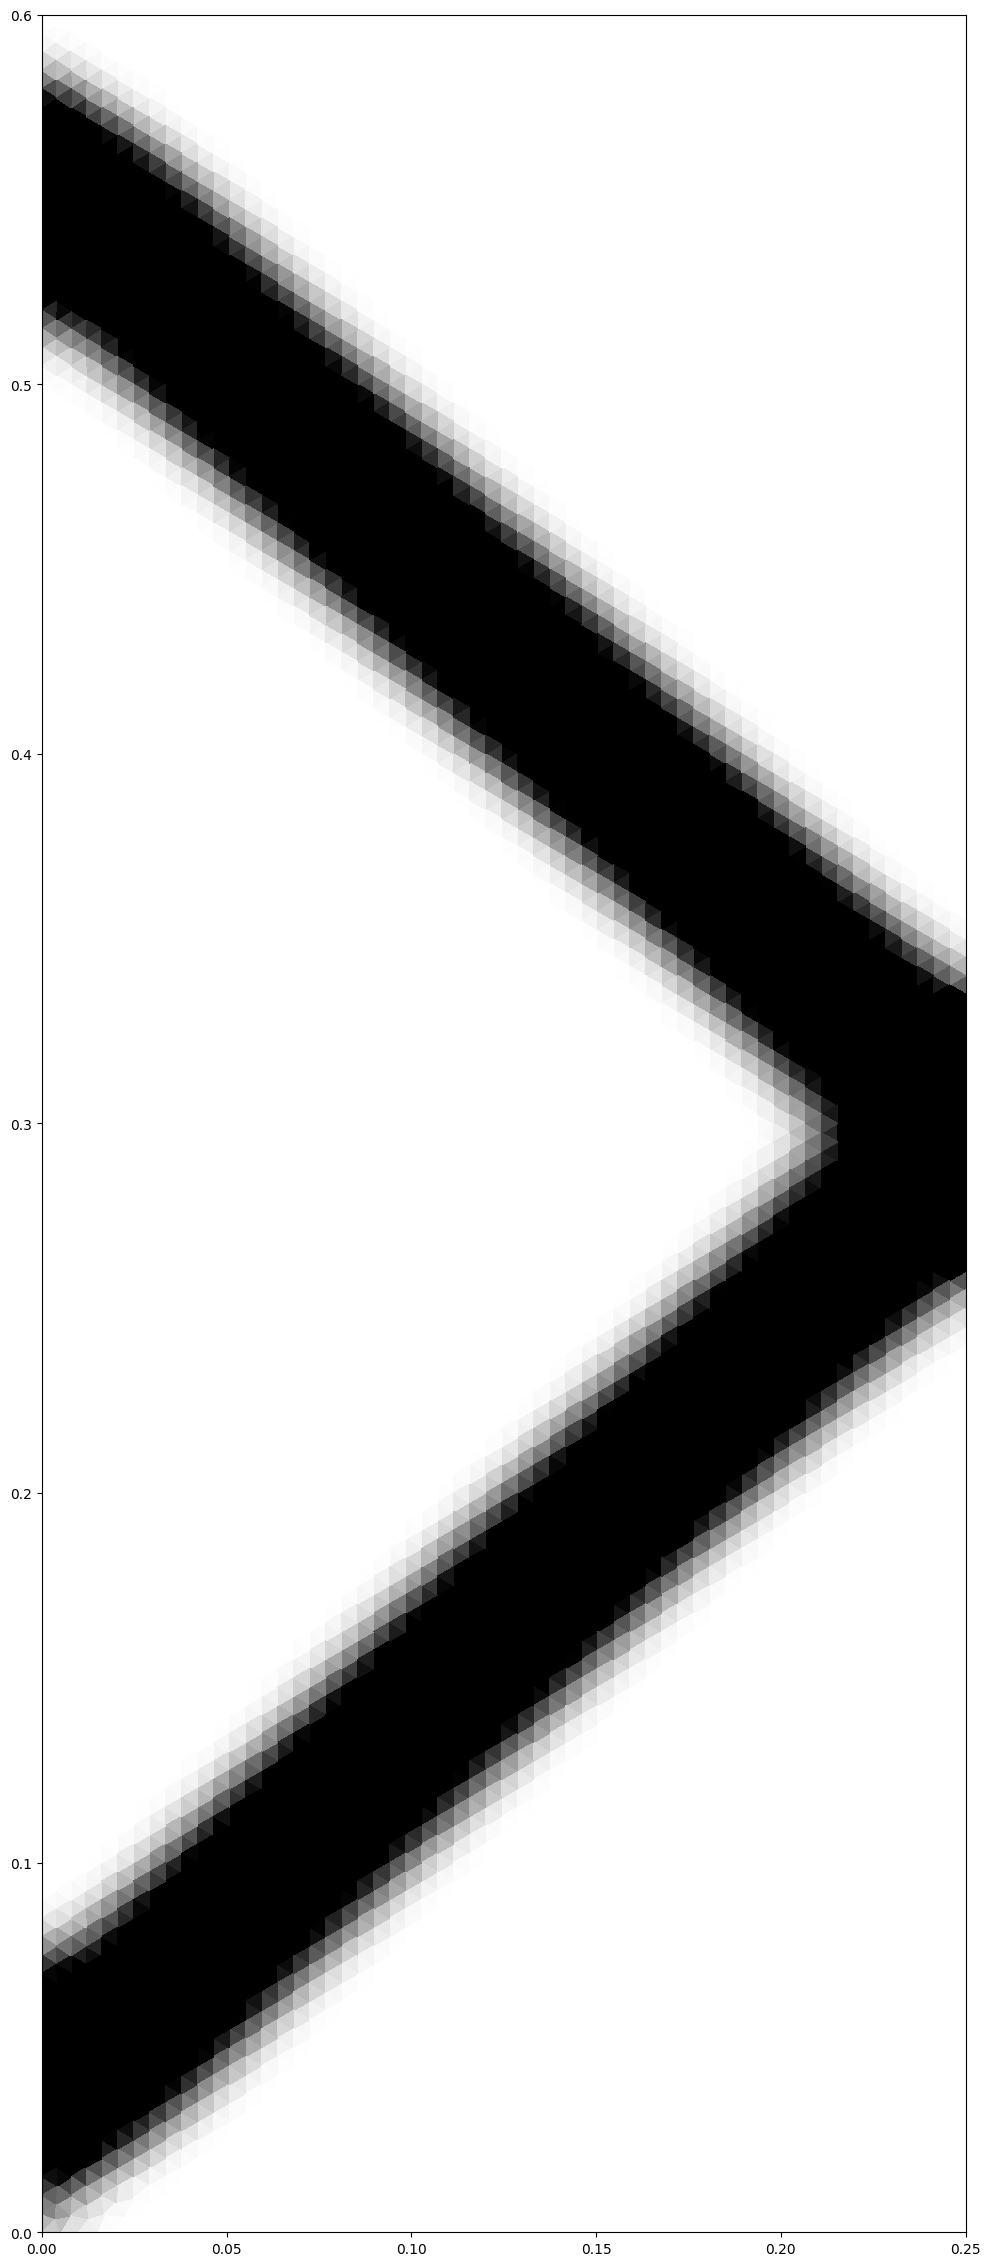

Computing stresses: 100%|██████████| 13942/13942 [00:00<00:00, 83278.84it/s]


0.09264682034700213 0.01395481005259488


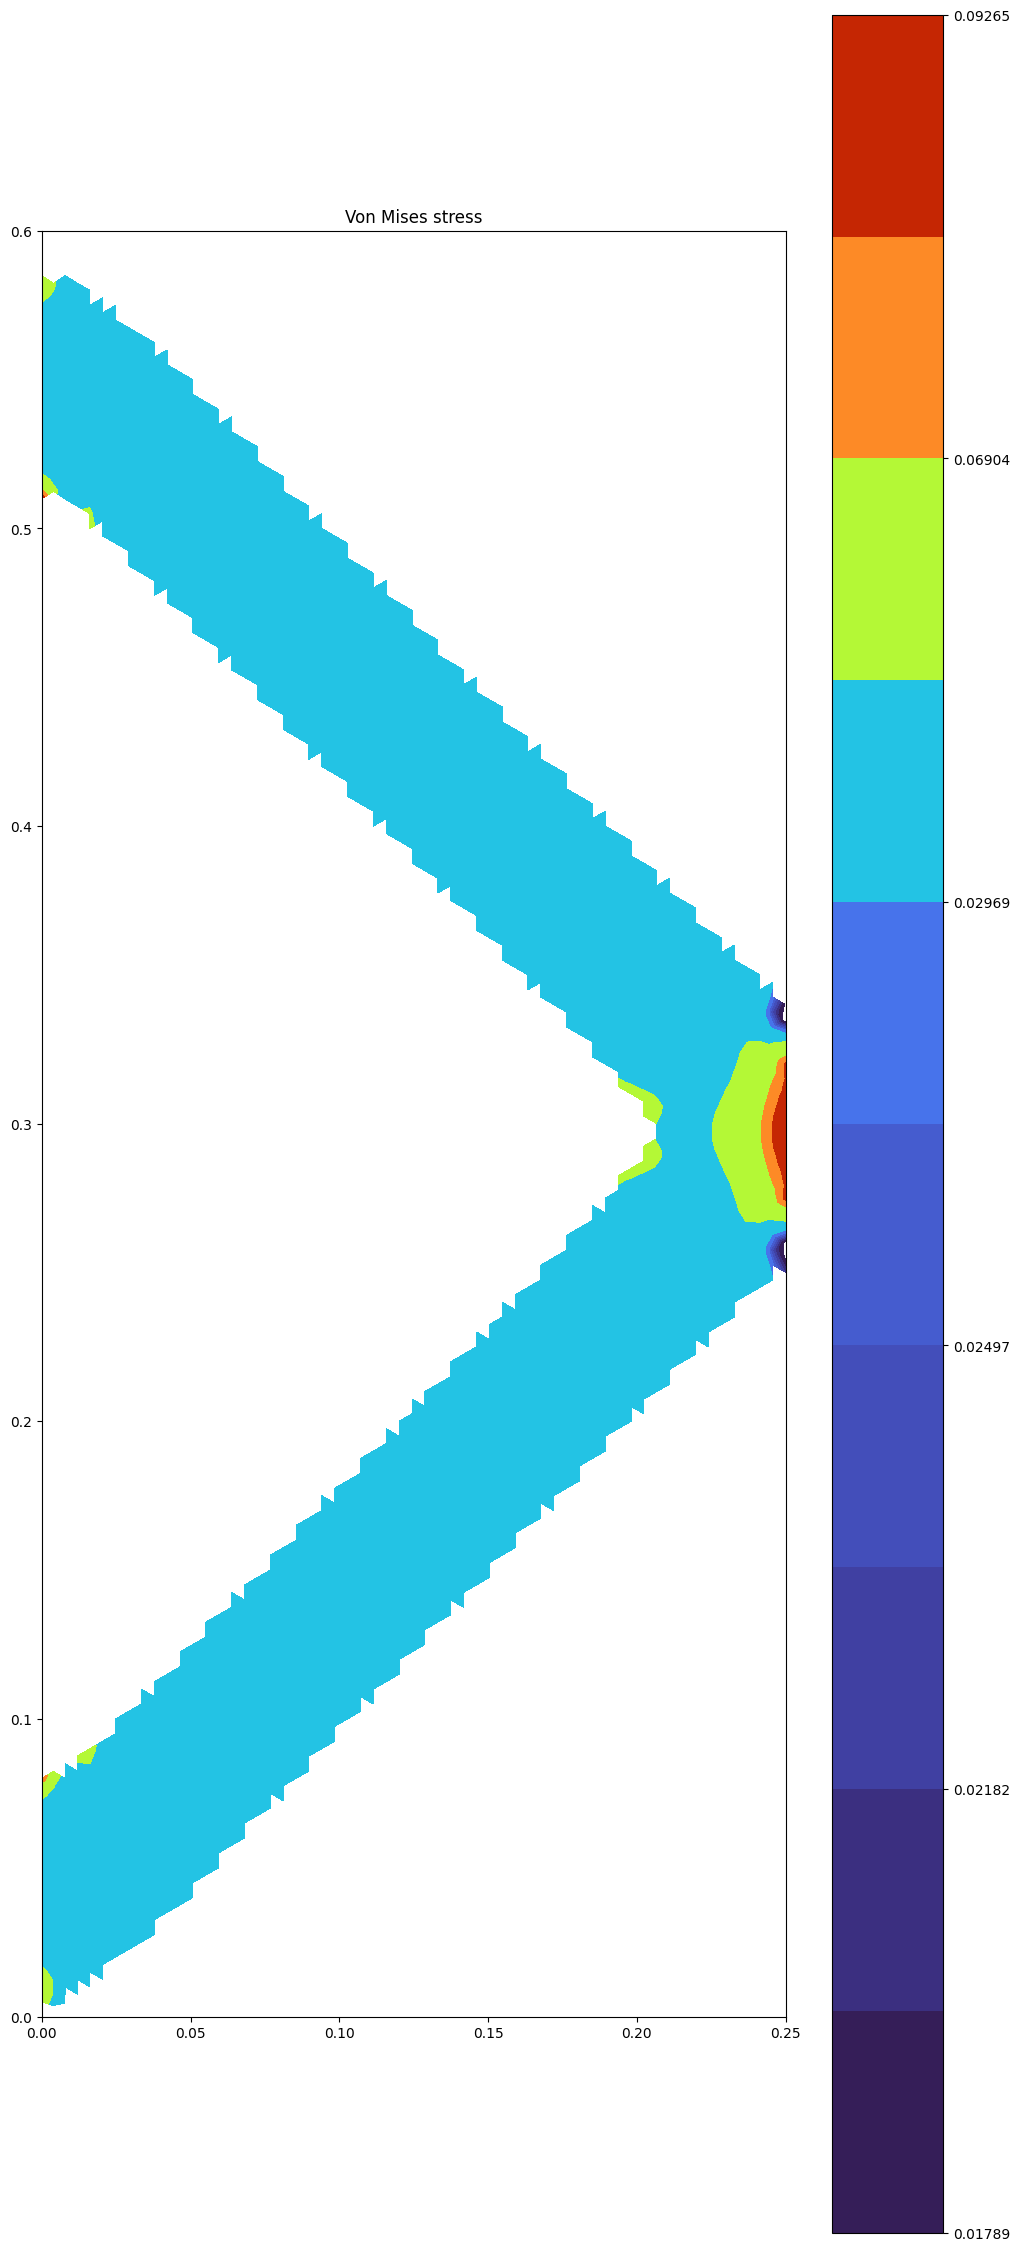

vf: 0.240010 | compliance: 0.000045 | max_stress: 0.117452


In [2]:
experiment_dir = "../configs/NN_top_optimization/SIMP_basic"

# select config
# config_name = "MBB_beam_half" 
# config_name = "MBB_beam_half_hrez" 
config_name = "Cant_beam"
# config_name = "Cant_beam_distrL"
# config_name = "Brecket"

config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
TopOptimizer.optimize(plot_interval=20)
TopOptimizer.print_metrics()